I've been asked a really simple question since my [last post on distributions](). 
> What _do_ you do with them? How does knowing the range of distributions help you in real world applications?

These are both really good questions, so I'll use this post today to discuss those two questions apply to two use cases of probability distributions:
* What you can do with the hypergeometric distribution (a discrete case)
* What you can do with the beta distribution (a continuous case)

If you have...
* **30 seconds**: knowing the various PMFs and PDFs is super handy, but you'll probably find that your data fits none of the "standard" distributions. Instead, the standard PMFs and PDFs are "models" and you may find that you rely on kernel density estimates of your data to have a feel for what it actually is.
* **10 minutes**: read on.

In [1]:
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make things pretty.
sns.set_style("ticks")
sns.set_context("paper")

## The Discrete Case: the hypergeometric distribution

Recall that the hypergeometric distribution is a probability mass function (PMF). It is used to describe random variables representing the number of "type _I_" objects that are found in a sample from a population. The canonical example is:
> I have a bag containing K white balls and N-K black balls. If I sample n balls, how many would be white (k)?

### The hypergeometric virus
Let's suppose we live in a town with **1000 people**. We know from official statistics that **10** people have been diagnosed with COVID-19 ( _for sake of argument_ , let's assume the disease is not transmissible). 

With the lockdown / social distancing in place, you decide to use your "exercise once a day" credit for a walk in the local park. However, you see **20** other individuals in the park. You may then ask,
> Can we estimate how many of these 20 individuals have COVID-19?

Intuitively, we know that the chances of bumping into one of those ten individuals with COVID-19 in this town is low, let alone two, or three. Furthermore, what are the chances that this would happen in the park? Put another way, we can view the distribution of individuals in this town as a contingency table:

|      | Has COVID-19 | Doesn't have COVID-19 | Total | 
| ---- | -------  | --------------------- | ---------  |
| Park |   k      |         n-k           | n |
| Not the park | K-k |       N-K-n+k    | N-n |  
| **Total**       | K   |       N-K          | N   | 


**This** is when having an understanding of probability distributions, in particular the hypergeometric distribution, can be very handy. By understanding that the hypergeometric distribution is an _appropriate model_ for this type of data, we can then do two further analyses:

1. Illustrate the probability of seeing a specific number of individuals with COVID-19 in the park
2. Perform hypothesis tests

#### 1. Illustration of the probability space

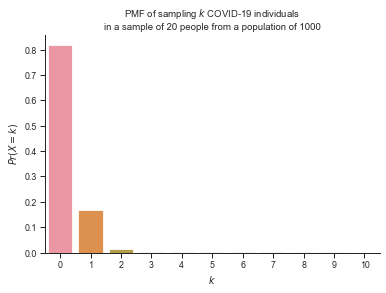

In [2]:
# Let's draw the probability mass function of the hypergeometric distribution
def hypergeometric_draw(k, K = 10, n = 20, N = 1000):
    """
    Return the hypergeometric PMF at k.
    :param: k: number of "successful" cases in the sample
    :param: K: total number of "successful" cases
    :param: n: sample size
    :param: N: population size
    """
    # The scipy notation for the hypergeometric distribution is ... a little odd.
    return sp.hypergeom.pmf(k, n = K, N = n, M = N)

# Let's visualise the probability space for seeing 0 to 10 COVID-19 patients
# in our sample of 20 individuals in the park.
n_vector = np.arange(0, 11, 1)
fig, ax = plt.subplots()

# We'll plot the hypergeometric distribution PMF
sns.barplot(
    n_vector, 
    list(map(hypergeometric_draw, n_vector)), ax = ax
)
sns.despine()

ax.set_xlabel("$k$")
ax.set_ylabel("$Pr(X = k)$")
_ = ax.set_title("PMF of sampling $k$ COVID-19 individuals\nin a sample of 20 people from a population of 1000")

plt.savefig("hypergeometric_pmf.png", dpi = 300)

You'll notice two things here:
* In this hypothetical town, it is most likely (~80% probability) that _none_ of those 20 individuals in the park had COVID-19.
* The chance that one of those 20 has COVID-19 is around 15%. Anything more, the probability becomes almost negligible.

#### 2. A hypothesis test with the hypergeometric distribution

I'll assume you know what hypothesis tests are in this section, though a brief primer is provided at the Appendix below. Given our scenario described above, we can formulate the following hypotheses:

* The _null_ hypothesis: the number of COVID-19 patients is distributed **randomly** between the park and everywhere else, **according to the hypergeometric distribution**.
* The _alternative_ hypothesis: the number of COVID-19 patients is higher in the park.

Going with our previous numbers of:
* 1000 people in the whole town
* 10 of whom have COVID-19
* 20 people were seen in the park

Now, let's suppose that **two** of those 20 individuals in the park were tested positive for COVID-19. Hypothesis tests then seek to quantify
> _How significant_ is this observation under the assumption that the null hypothesis **is true**?

Estimating the p-value is equivalent to getting the "area under the curve" of the hypergeometric distribution. 
> For our example, it can be obtained by `1 - CDF(k)` where $k$ is 2.

The p-value is: 0.015542413797821064


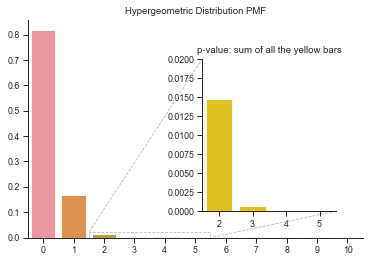

In [24]:
# Number of tested COVID-19 patients
k = 2

# P-value calculation
p_value = 1 - sp.hypergeom.cdf(k-1, n = 10, N = 20, M = 1000)
print(f"The p-value is: {p_value}")

# Inset axis plot - inspired by https://scipython.com/blog/inset-plots-in-matplotlib/
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots()
inner_ax = inset_axes(ax,  "40%", "70%" ,loc="lower right", borderpad=3)

n_vector = np.array(n_vector)
pmf_hypergeom = np.array(list(map(hypergeometric_draw, n_vector)))

# Plot the barplot of the main axis
sns.barplot(
    n_vector,
    pmf_hypergeom,
    ax = ax
)

# Plot the barplot of the inset
sns.barplot(
    n_vector, 
    pmf_hypergeom,
    ax = inner_ax,
    palette = ['#e3e3e3' if _ < k else '#ffd700' for _ in n_vector ]
)

inner_ax.set_xlim((1.5, 5.5))
inner_ax.set_ylim((0, 0.02))

ax.set_title("Hypergeometric Distribution PMF")
inner_ax.set_title("p-value: sum of all the yellow bars")

mark_inset(ax, inner_ax, loc1 = 2, loc2 = 4, fc = 'none', ec = '0.7', linestyle = '--')
sns.despine()

plt.savefig("inset_hypergeometric.png", dpi = 300)

The p-value for this test is a low 0.0155! This means that, *if* the distribution of individuals with COVID-19 _was indeed random_ , **and** following the hypergeometric distribution, the probability of seeing **two** (or more) COVID-19 patients in the park is 0.0155. 

This gives us a safe bet to reject the null hypothesis. Now let's cover what we can do with knowing the distributions of continuous random variables.

## The Continuous Case: the beta distribution

Recall that the beta distribution is a probability distribution function (PDF). It is used to describe random variables whose values lie within 0 and 1. This makes it a pretty good choice for sampling percentages, probabilities, etc.

### Let's get some baskets
(Inspired by [Variance Explained](http://varianceexplained.org/statistics/beta_distribution_and_baseball/))

The COVID-19 lockdown has put the NBA season on hold, and the season has shut down. You're the general manager and tasked with drafting a player for the new season. We're considering drafting LaMelo Ball, who's currently playing in Australia (who knew?!)

It turns out that there [isn't that much data available for LaMelo Ball](https://basketball.realgm.com/player/LaMelo-Ball/Summary/103892), so it's kind of difficult to extrapolate how good of a scorer he'll be when he comes to the NBA.

However, knowing that the beta distribution is an appropriate model for LaMelo's field goal (FG) percentage means we can:

* Illustrate a possible distribution of FG percentages
* Perform Bayesian inference

For this experiment we'll just use LaMelo's NBL numbers, but in the Appendix I'll explain some limitations.

#### 1. Illustration of the probability space

Recall that the beta distribution is appropriate for representing random variables that are like percentages, and parameterised by two shape parameters: $\alpha$ and $\beta$.

But, how do we choose an appropriate $\alpha$ and $\beta$ for LaMelo's FG percentage beta distribution? We can rely on two clues:

* Beta distributions with high $\alpha$ and low $\beta$ are negative skewed (larger probabilities = higher value of the PDF), and vice-versa.
* The expected value (average) of a beta distribution is

$$\mathbb{E} [ X ] = \dfrac{\alpha}{\alpha+\beta}$$

Thus, we can assume then that $\alpha$ represents FGs made and $\beta$ FGs missed. In LaMelo's case, since he made 75 and attempted 199 (thus missing 124) in his _single_ NBL season, we can use that to parameterise the distribution. 

The FG% with the highest density is 0.38


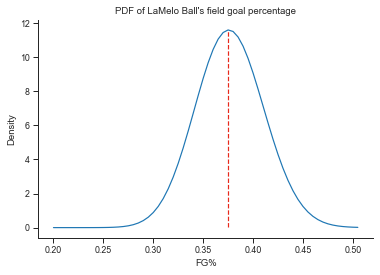

In [13]:
# Let's draw the probability distribution function of the beta distribution
def beta_draw(x, a, b):
    """
    Return the beta distribution PDF at k.
    :param: x: value between 0 and 1
    :param: a, b: shape parameters
    """
    # The scipy notation for the hypergeometric distribution is ... a little odd.
    return sp.beta.pdf(x, a = a, b = b)

fig, ax = plt.subplots()
possible_percentages = np.arange(0.2, 0.51, 0.005)

fg_made = 75
fg_missed = 199-75

beta_vals = list(map(lambda x: beta_draw(x, a = fg_made, b = fg_missed), possible_percentages))
max_value = possible_percentages[np.argmax(beta_vals)]

print("The FG% with the highest density is {:.2f}".format(max_value))

# We'll plot the beta distribution PDF
sns.lineplot(possible_percentages, beta_vals, ax = ax)
plt.axvline(max_value, ymin = 0.05, ymax = 0.95, color = '#e8291c', linestyle = '--')
sns.despine()

# Some decorative stuff
ax.set_xlabel("FG%")
ax.set_ylabel("Density")
_ = ax.set_title("PDF of LaMelo Ball's field goal percentage")

plt.savefig("beta_pdf.png", dpi = 300)

#### 2. Bayesian Inference on Field Goals

Now that we know the Beta distribution of LaMelo's field goal percentage, we can use it as a prior for Bayesian inference. Recall that Bayesian inference can be formulated as shown below; 

$$ Pr(FG|Data) \propto Prior(FG) \times Likelihood(Data) $$

Using this framework, we can **estimate** the true field goal percentage by combining our prior estimate of the FG percentage, and with some observed data. (Side note: this observed data would come from a binomial distribution).

However, as we _don't_ have observations, let's generate some random numbers as our "observed" FGs that are made over 82 games of a "typical" NBA season.

In [25]:
import pymc3 as pm

# LaMelo attempts about 16 shots a game (199 shots / 12 games)
# So let's bump this estimate up a bit to 20 shots a game, over an 82 game season.
np.random.seed(42)
pseudo_obs = sp.randint.rvs(0, 12, size = 82)

with pm.Model() as model:
    # Establish the prior
    field_goal_percentage = pm.Beta("FG", alpha = 75, beta = 199-75)
    
    # Set the binomial distribution to model baskets made with 20 shots attempted per game
    field_goal_data = pm.Binomial("Baskets", n = 12, p = field_goal_percentage, observed = pseudo_obs)

    # Run the metropolis-hastings algorithm
    step = pm.Metropolis()
    
    # Sample the trace
    trace = pm.sample(10000, step = step, cores=1)

Sequential sampling (2 chains in 1 job)
Metropolis: [FG]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:00, 8957.36it/s]
The number of effective samples is smaller than 25% for some parameters.


The FG% with the highest density in the prior distribution is 0.38
The FG% with the highest density in the posterior distribution is 0.47


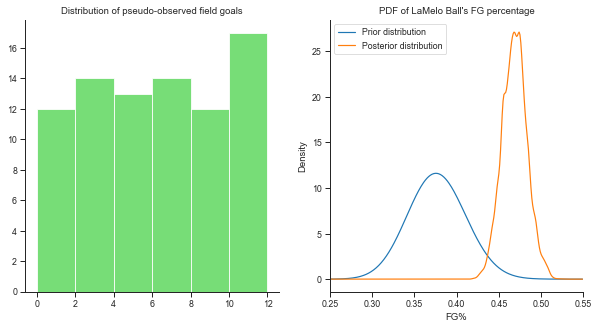

In [28]:
fig, (ax, ax2) = plt.subplots(1,2)

# Plot the pseudo-observations to give context
ax.hist(pseudo_obs, bins = np.arange(0,13,2), color = '#77dd77')
ax.set_title("Distribution of pseudo-observed field goals")

# Prior distribution
possible_percentages = np.arange(0.2, 0.55, 0.001)
prior = list(map(lambda x: beta_draw(x, a = 75, b = 199-75), possible_percentages))

# Plot the prior
ax2.plot(possible_percentages, prior, label = 'Prior distribution')

# Plot the posterior
posterior_density = [sp.gaussian_kde(trace['FG']).evaluate(_) for _ in possible_percentages]
ax2.plot(possible_percentages, posterior_density, label = "Posterior distribution")

max_value_prior = possible_percentages[np.argmax(prior)]
max_value_posterior = possible_percentages[np.argmax(posterior_density)]

print("The FG% with the highest density in the prior distribution is {:.2f}".format(max_value_prior))
print("The FG% with the highest density in the posterior distribution is {:.2f}".format(max_value_posterior))

sns.despine()
ax2.set_xlim((0.25, 0.55))

ax2.set_xlabel("FG%")
ax2.set_ylabel("Density")
_ = ax2.set_title("PDF of LaMelo Ball's FG percentage")
_ = ax2.legend(loc='upper left')

fig.set_size_inches((10,5))
plt.savefig("posterior_distribution.png", dpi = 300)

Hopefully this gives you a brief insight into how knowing different probability distributions can be useful for an aspiring data scientist. 

In practice, data doesn't necessarily conform to a known probability distribution's shape - for example, data can be bi-modal (traffic jams tend to happen closer to 9AM and just after 5PM). Probability distributions are intended to guide your reasoning more than anything else! Have fun with it, experiment, and learn.

### Appendix

#### What are hypothesis tests?

You may have heard of tests like the $t$-test before; tests like these are used to measure the significance of some observed lab results.

Hypothesis tests aim to quantify the _extremity_ of a particular observation under the assumption that some "null" hypothesis is **true**. The extremity is measured as a probability -- the beloved (or despised) **p-value**.

To break it down:

| Term | Definition | Example(s) |
| ---- | ---------- | ------- | 
| Hypothesis test | A test to measure extremity of an observation | $t$-test, $\chi^2$ tests, ANOVA.... |
| Null hypothesis | Some default position regarding the nature of the random variable | "The data is distributed randomly" |
| Alternative hypothesis | Usually counteracts the null | "The data is not distributed randomly" | 

#### The LaMelo ball experiment

While there isn't much data out there for LaMelo Ball, we know that his brother Lonzo is in the NBA! Assuming that, as point guards, both he and his brother Lonzo play similarly, we can potentially combine the data from Lonzo and LaMelo to **estimate LaMelo's field goal percentage in the NBA**.

However, we would have to...
* Assume that Lonzo and LaMelo play so similarly that their field goal percentages should be more or less similar.
* Assume that it is just as easy to get a field goal in the NBA and the NBL
* Assume that season-by-season field goal percentages are more or less the same

Once those assumptions are OK to take, we can then use LaMelo's Australian NBL field goal percentage as a prior, then use Lonzo's NBA numbers to compute a posterior distribution.